# HOMEWORK 3

#### Trabalho realizado por:
- António Ramos, 101193, ajframos@ua.pt, MEI
- Emanuel Ferreira, 104560, emanuels.ferreira@ua.pt, MEI
- Rafael Sá, 104552, rafael.sa@ua.pt, MEI

#### Grupo 15
  
## Avaliação de Desempenho

In [1]:
#numeric: pandas and numpy
import numpy as np
import pandas as pd
# graphics
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 

## Toy Data

In [2]:
from sklearn.datasets import make_blobs, make_circles, make_moons, make_circles

X_blobs, y_blobs = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=None)

X_moon,y_moon= make_moons(n_samples=1000, shuffle=True, noise=None, random_state=None)

X_cir, y_cir= make_circles(n_samples=1000, shuffle=True, noise=None, random_state=None, factor=0.4)

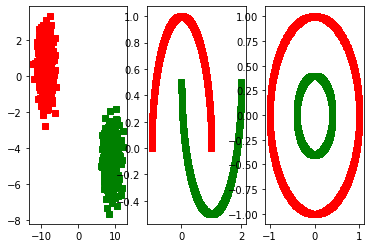

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.scatter(X_blobs[y_blobs==0,0],X_blobs[y_blobs==0,1],marker='s',color='r',label='0' )
ax1.scatter(X_blobs[y_blobs==1,0],X_blobs[y_blobs==1,1],marker='s',color='g',label='0' )

ax2.scatter(X_moon[y_moon==0,0],X_moon[y_moon==0,1],marker='s',color='r',label='0' )
ax2.scatter(X_moon[y_moon==1,0],X_moon[y_moon==1,1],marker='s',color='g',label='0' )

ax3.scatter(X_cir[y_cir==0,0],X_cir[y_cir==0,1],marker='s',color='r',label='0' )
ax3.scatter(X_cir[y_cir==1,0],X_cir[y_cir==1,1],marker='s',color='g',label='0' )


# Model  Evaluation


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


## Evaluation:  Train and Test with hold-out


In [5]:
 X_blobs_train, X_blobs_test, y_blobs_train, y_blobs_test = train_test_split( X_blobs, y_blobs, test_size=0.3, random_state=0)
 X_moon_train,  X_moon_test, y_moon_train, y_moon_test = train_test_split( X_moon, y_moon, test_size=0.3, random_state=0)
 X_cir_train, X_cir_test, y_cir_train, y_cir_test = train_test_split( X_cir, y_cir, test_size=0.3, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   

X_blobss=scaler.fit_transform(X_blobs_train)
X_blobstest=scaler.transform(X_blobs_test)
X_moons=scaler.fit_transform(X_moon_train)
X_moontest=scaler.transform(X_moon_test)
X_cirs=scaler.fit_transform(X_cir_train)
X_cirtest=scaler.transform(X_cir_test)

In [7]:
from sklearn.linear_model import Perceptron
ppn_blobs=Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=20, tol=None, 
               eta0=0.1, n_jobs=1, random_state=0, class_weight=None, warm_start=False)
ppn_moon=Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=20, tol=None, 
               eta0=0.1, n_jobs=1, random_state=0, class_weight=None, warm_start=False)
ppn_cir=Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=20, tol=None, 
               eta0=0.1, n_jobs=1, random_state=0, class_weight=None, warm_start=False)
ppn_blobs.fit(X_blobs_train,y_blobs_train)
ppn_moon.fit(X_moon_train,y_moon_train)
ppn_cir.fit(X_cir_train,y_cir_train)
y_blobs_pred=ppn_blobs.predict(X_blobs_test)
y_moon_pred=ppn_moon.predict(X_moon_test)
y_cir_pred=ppn_cir.predict(X_cir_test)

### Matriz de confusão - Perceptrão

Aqui mostramos as matrizes de confusão de todos os datasets nos dados de teste.

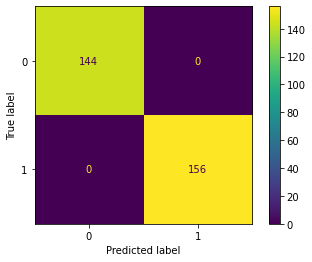

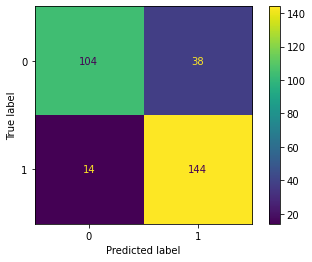

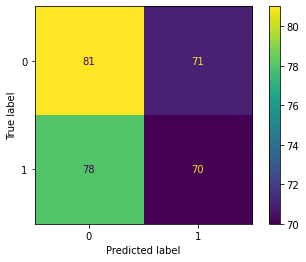

In [8]:
plot_confusion_matrix(ppn_blobs, X_blobs_test, y_blobs_test)
plot_confusion_matrix(ppn_moon, X_moon_test, y_moon_test)  
plot_confusion_matrix(ppn_cir, X_cir_test, y_cir_test)  
plt.show() 

### Conclusões

    A matriz de confusão é a matriz que representa a contagem do número de dados de treino de cada classe versus a classe que o classificador obteu. Neste caso específico, como é um problema binário, a matriz de confusão é de dimensão 2x2.
    
    Na primeira matriz de confusão, para o dataset "Blobs", podemos ver que todos os dados de teste foram classificados corretamente. Chegamos a esta conclusão analisando cada um dos "quadrados" representados:
     - No primeiro valor, (0,0), vemos a contagem de dados de treino que foram classificados com o valor 0 e que realmente pertencem à classe 0, ou seja, classificações corretas. 
     - Na contagem (0,1) vemos a contagem de dados que foram classificados como classe 1 e que na verdade pertencem à classe 0.
     - Na contagem (1,0) os que foram classificados com classe 0 e pertencem à classe 1
     - E por fim (1,1) os que foram classificados corretamente como classe 1
     
     Fazendo esta análise para a matriz de confusão do dataset "Moon", podemos ver que nem todos os dados de teste foram classificados corretamente. Neste caso, 14 foram classificados como classe 0 quando pertencem à classe 1 e 38 como pertencentes à classe 1 sendo da classe 0. Os restantes dados 104+144=248 foram classificados corretamente como pertencentes à classe 0 ou 1.
     
     Quanto ao dataset "Circles" os resultados foram ainda piores. Houve 71+78 dados que foram classificados incorretamente. 71 como classe 1 sendo que pertencem à classe 0 e 78 como pertencentes à classe 0 sendo da classe 1.
        
     

#### Métricas

    Para avaliar concretamente o classificador existem algumas métricas: precision, recall, accuracy. Estas métricas são calculadas usando os valores da matriz de confusão.

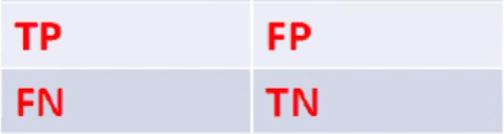

    E usando as formulas:

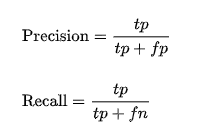

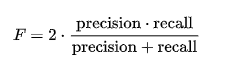

    Em vez de fazermos os cálculos para estas métricas utilizando as formas descritas anteriormente, decidimos usar o sklearn que possui já funções para fazer obter este tipo de métricas.

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_blobs_test, y_blobs_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00       156

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [10]:
print(classification_report(y_moon_test, y_moon_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       142
           1       0.79      0.91      0.85       158

    accuracy                           0.83       300
   macro avg       0.84      0.82      0.82       300
weighted avg       0.83      0.83      0.82       300



In [11]:
print(classification_report(y_cir_test, y_cir_pred))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52       152
           1       0.50      0.47      0.48       148

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300

